In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fredapi as f
from secret import akey

In [189]:
import matplotlib as m
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [190]:
fred = f.Fred(api_key=akey)

In [191]:
# https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM
# Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars
df = pd.DataFrame(fred.get_series('GOLDPMGBD228NLBM'),columns=['gold'])
df.to_csv('Data/gold'+'_'+ datetime.now().isoformat()+'.csv')
df = df.fillna(method='pad',limit=4)
# gold etf volatility index # CBOE Gold ETF Volatility Index
#getfvol = fred.get_series(series_id='GVZCLS')

In [193]:
df['ma_34'] = df.gold.rolling(window=34).mean()
df['ma_89'] = df.gold.rolling(window=89).mean()
df['priceGap34'] = 100. * (df.ma_34 - df.gold)/df.ma_34
df['priceGap89'] = 100. * (df.ma_89 - df.gold)/df.ma_89
df['madiff']     = (df.ma_89 - df.ma_34) * 100. / df.ma_89
df.dropna().describe()

,gold,ma_34,ma_89,priceGap34,priceGap89,madiff
count,13117.000000,13117.000000,13117.000000,13117.000000,13117.000000,13117.000000
mean,521.056463,519.567737,517.127662,-0.473049,-1.260960,-0.725835
std,429.473417,428.698416,427.548045,4.129508,7.054276,4.277753
min,34.750000,34.951176,35.060281,-55.000669,-87.864663,-31.007277
25%,277.500000,277.692647,277.901124,-2.235077,-3.964989,-2.452045
50%,379.200000,380.054412,379.797753,-0.048059,-0.305154,-0.150176
75%,628.000000,627.839706,611.313483,1.616108,2.498258,1.614223
max,1895.000000,1803.125000,1739.019663,24.387857,21.050460,14.177201


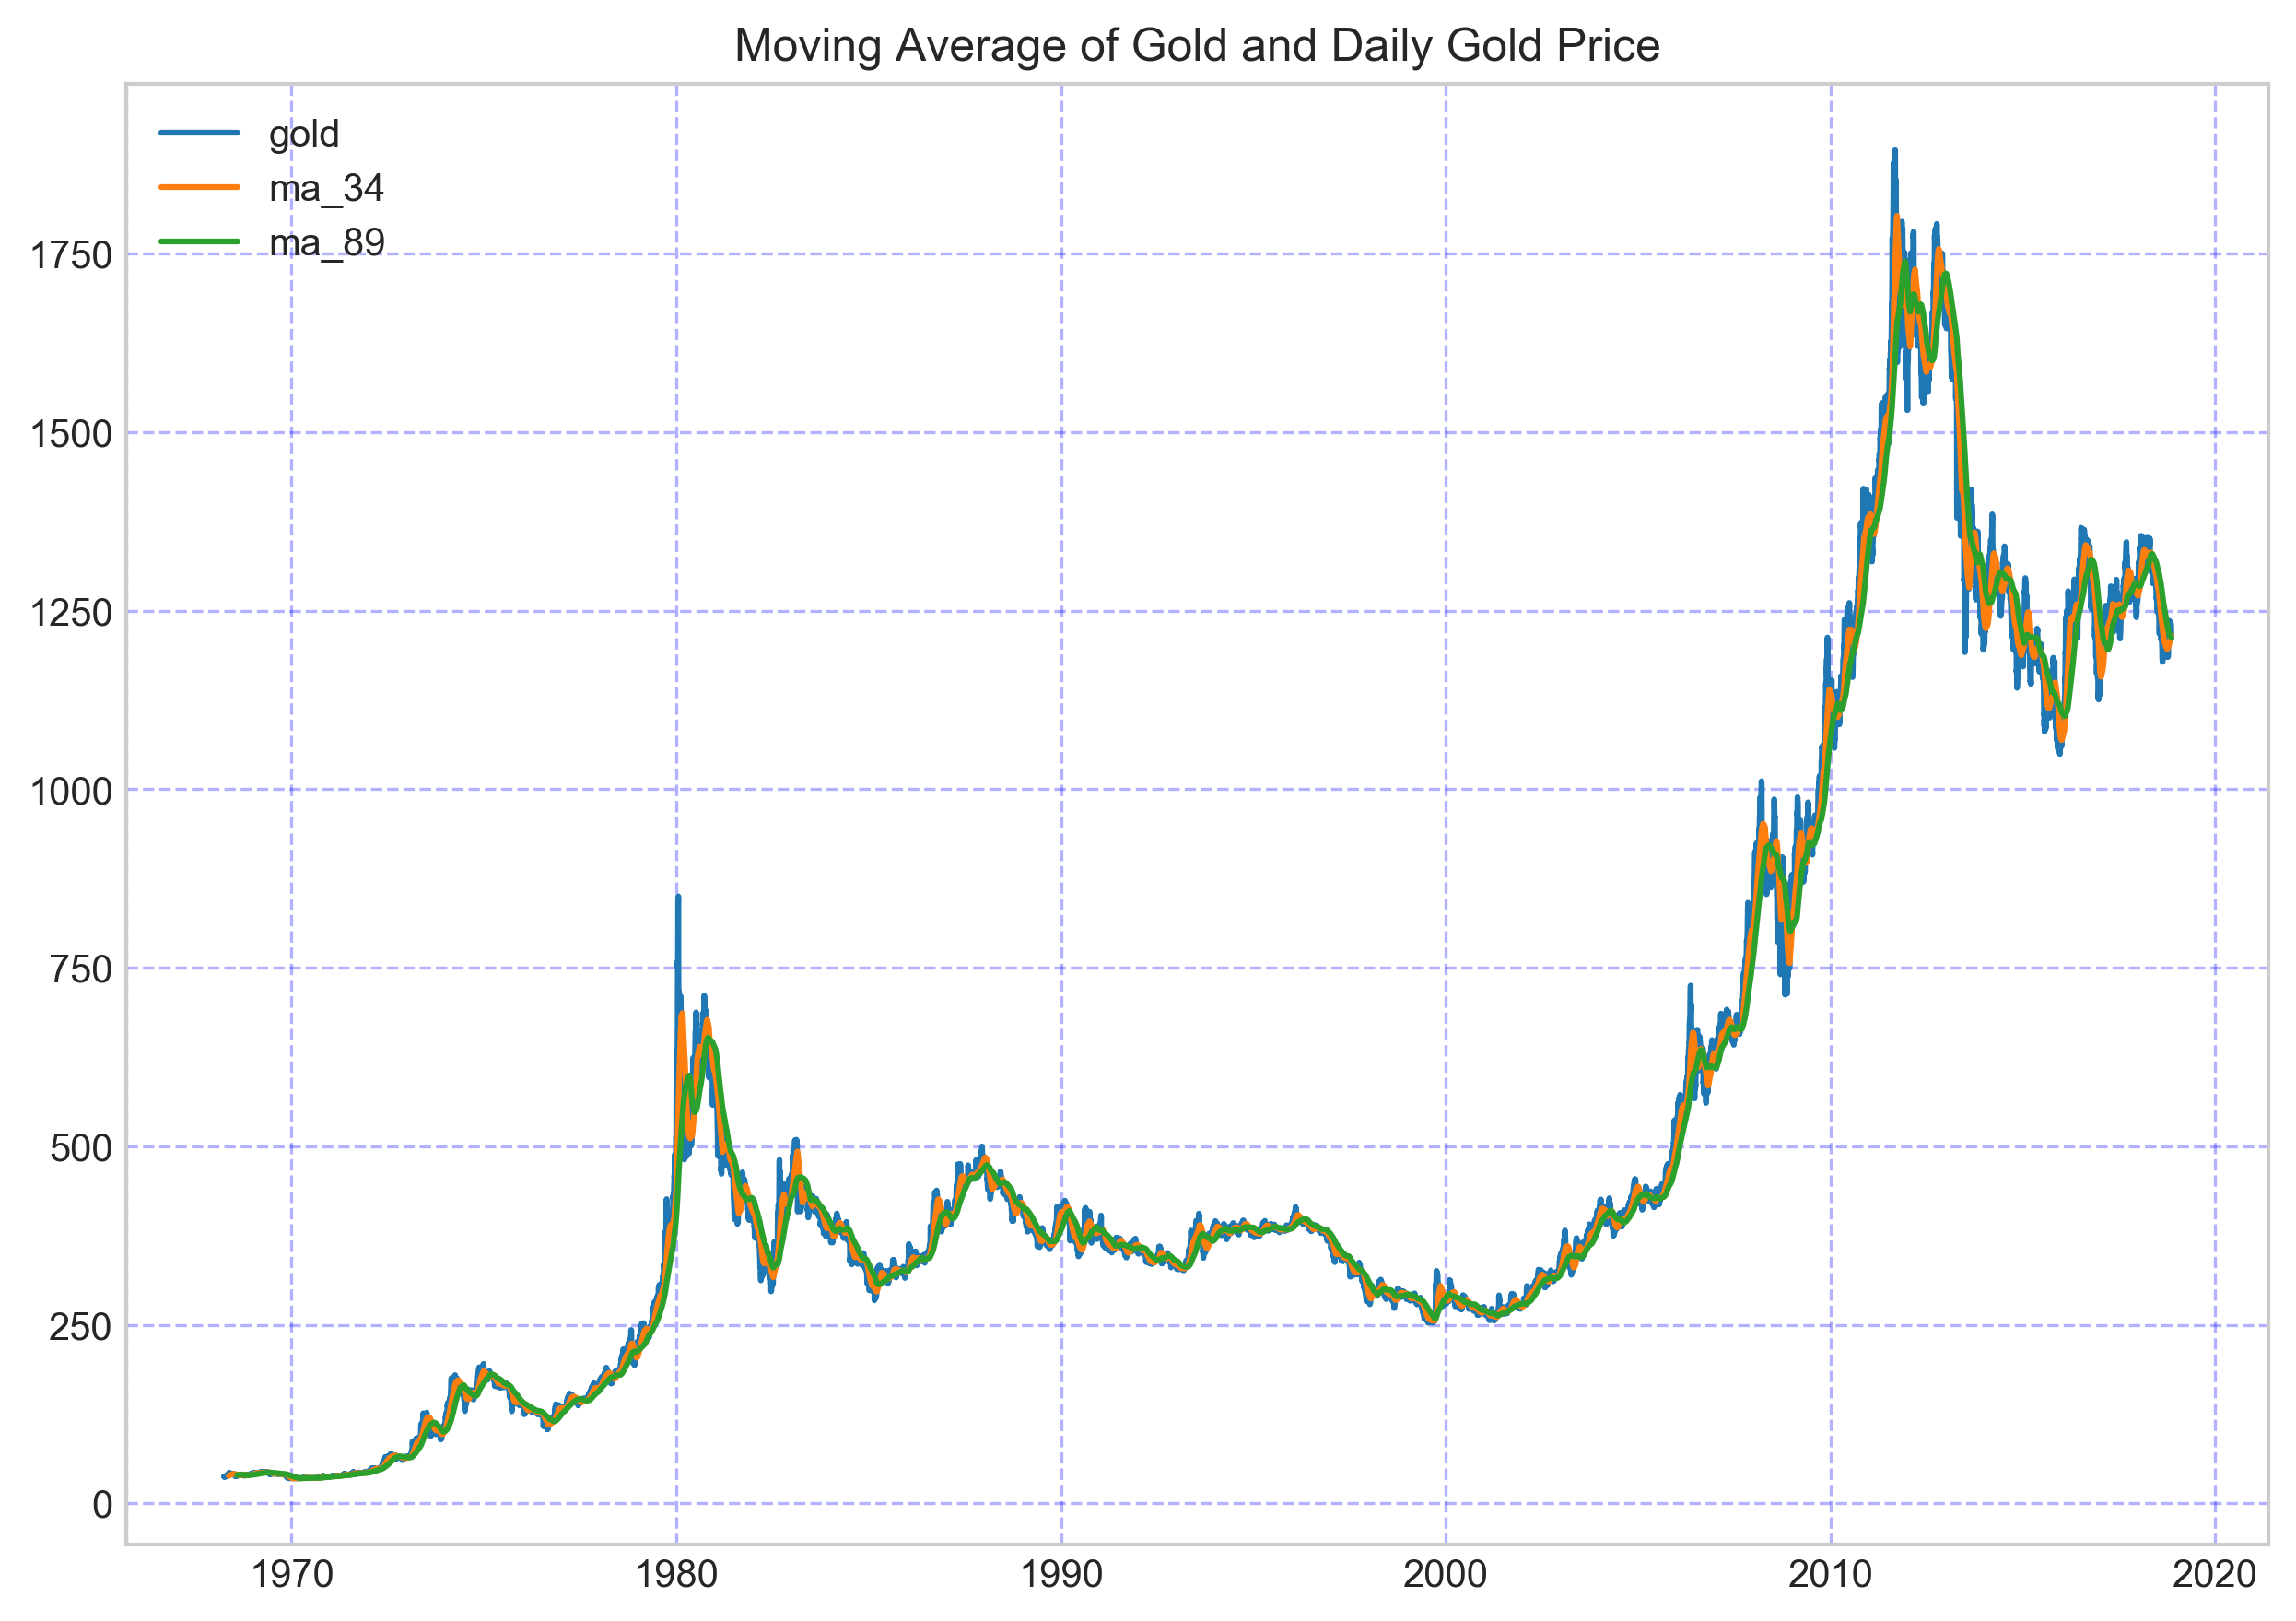

In [194]:
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df[['gold','ma_34','ma_89']].plot(subplots=False,figsize=(10,7),ax=ax1)
ax1.set_title('Moving Average of Gold and Daily Gold Price', fontsize=12)
ax1.grid(linestyle='--',color='blue',alpha=0.3)
ax1.legend(loc='upper left')
plt.show()

### Same plot  yearwise

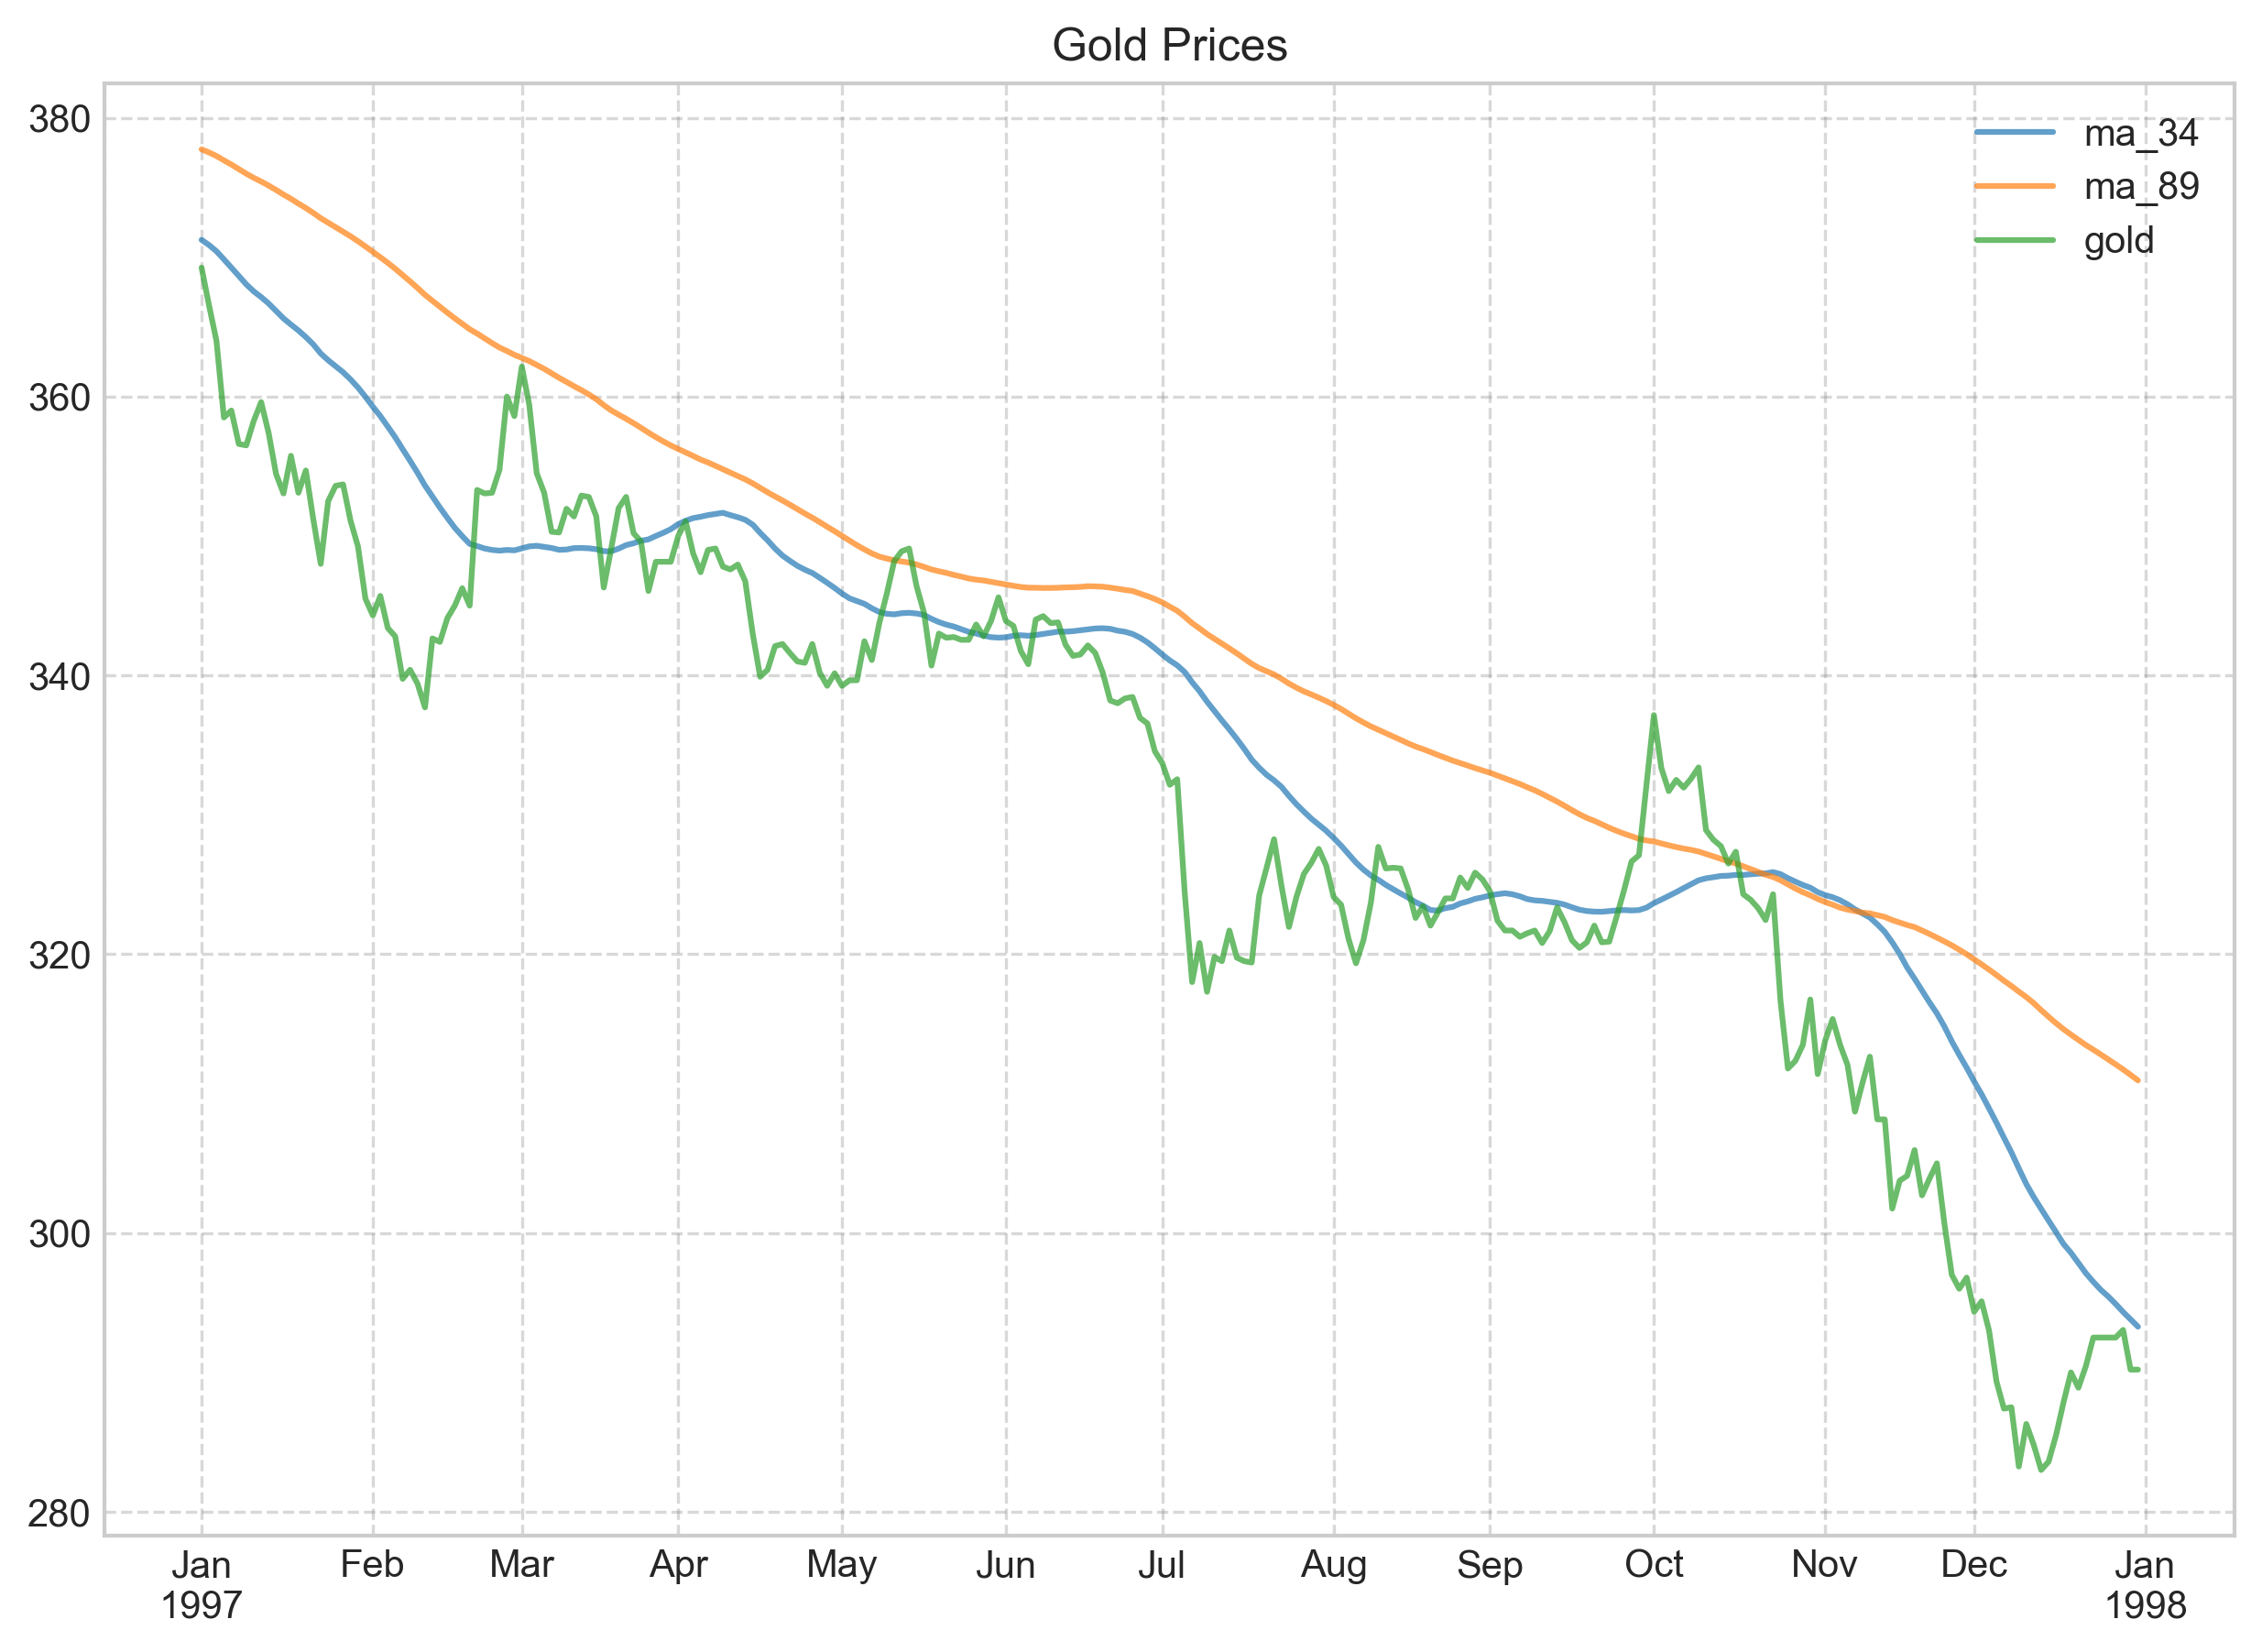

In [195]:
yr = 1997
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df.loc[df.index.year == yr,['ma_34','ma_89','gold']]\
.plot(subplots=False,figsize=(10,7),ax=ax1,alpha=0.7)
ax1.set_title('Gold Prices', fontsize=12)
ax1.grid(linestyle='--',color='gray',alpha=0.3)
plt.show()
#md3.display(fig)

## Look at the differences

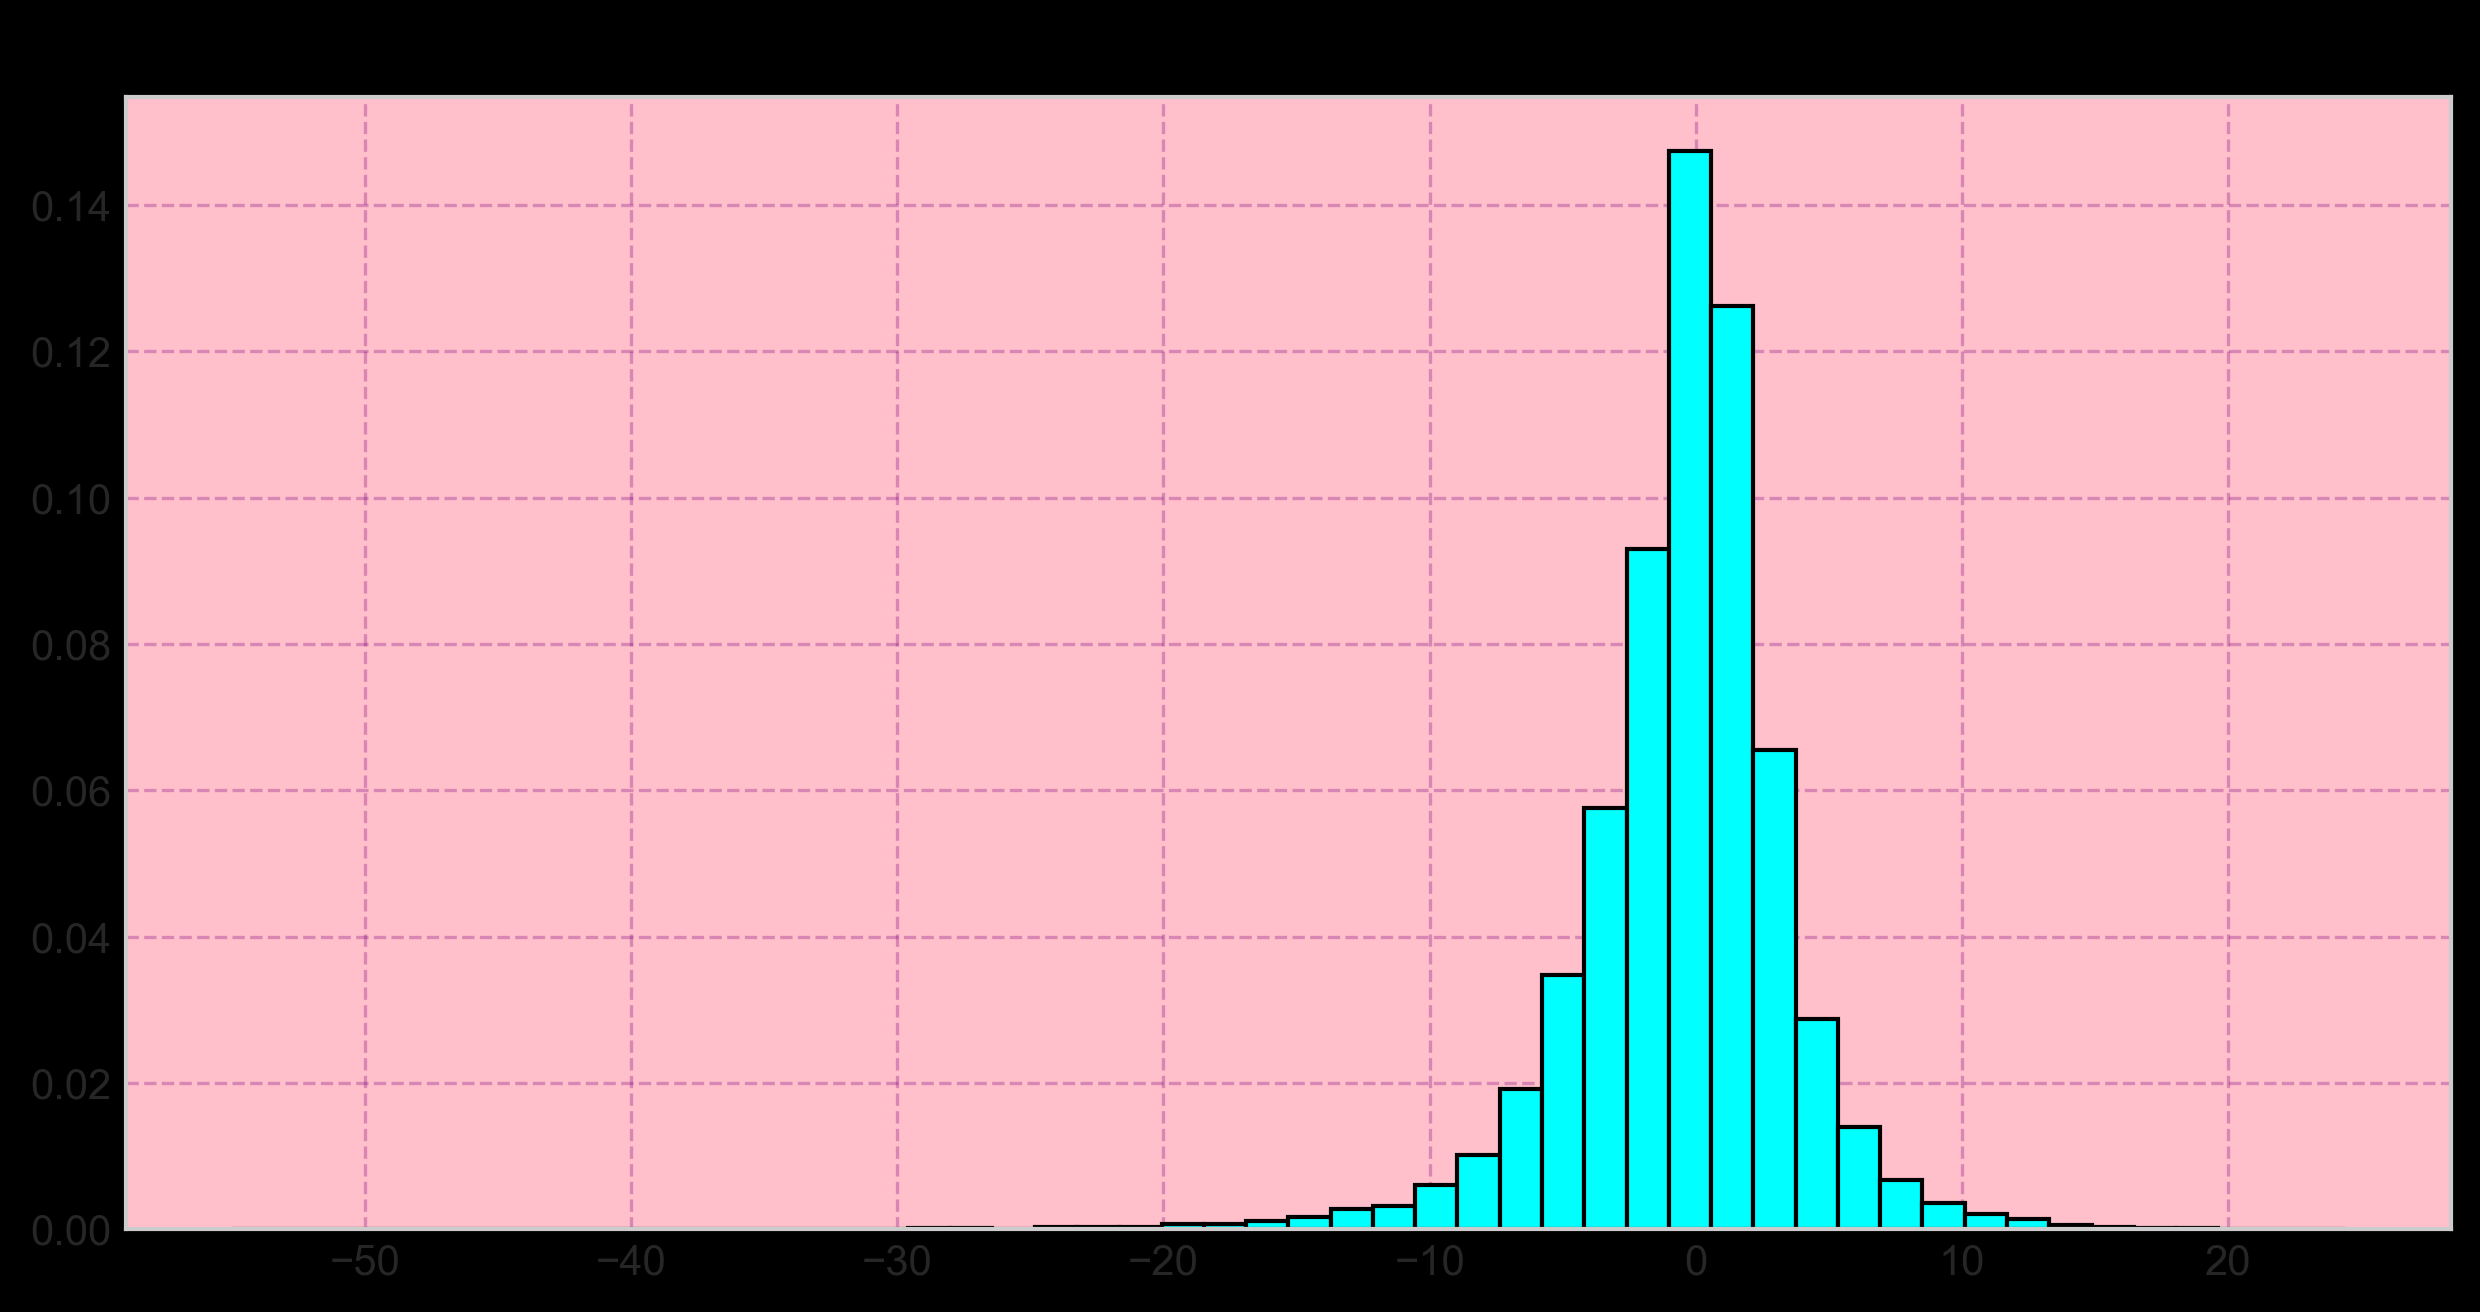

In [215]:
fig, ax = plt.subplots()
fig.set_dpi(300)
fig.set_facecolor('black')
df.priceGap34.hist(figsize=(10,5),bins=50,fill=True, density = True,\
        color='cyan',edgecolor='black',ax=ax)
ax.set_title('The difference between price and 34 Day MA',fontsize=14,color='black')
ax.grid(linestyle='--',color='purple',alpha=0.3)
ax.set_facecolor('pink')
plt.show()

In [197]:
np.abs(df.priceGap34).describe()

count    13172.000000
mean         2.779462
std          3.090041
min          0.000000
25%          0.820772
50%          1.880466
75%          3.672561
max         55.000669
Name: priceGap34, dtype: float64